In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

In [2]:
def VWAP(DF):
    df=DF.copy()
    df["typ"]=(df["High"]+df["Low"]+df["Close"])/3
    df["typ_vol"]=df["typ"]*df["Volume"]
    df["cum_typ_vol"]=df["typ_vol"].cumsum()
    df["cum_vol"]=df["Volume"].cumsum()
    df["vwap"]=df["cum_typ_vol"]/df["cum_vol"]
    return df["vwap"]

In [3]:
ticker='spy'

In [4]:
stock_intraday=pd.read_csv("SPY_intraday.csv")
stock_intraday["Datetime"]=pd.to_datetime(stock_intraday["Datetime"])
stock_intraday["Adj Close"]=stock_intraday["Close"]
#might drop "Close"
stock_intraday.index=stock_intraday["Datetime"]
#might drop "Datetime"
stock_intraday

,Datetime,Open,High,Low,Close,Volume,hours,Adj Close
Datetime,,,,,,,,
2005-01-03 09:30:00,2005-01-03 09:30:00,87.0610,87.1326,87.0109,87.1111,1251700,intraday,87.1111
2005-01-03 09:35:00,2005-01-03 09:35:00,87.1111,87.2042,87.0968,87.1827,934900,intraday,87.1827
2005-01-03 09:40:00,2005-01-03 09:40:00,87.1541,87.1684,87.0968,87.1326,865500,intraday,87.1326
2005-01-03 09:45:00,2005-01-03 09:45:00,87.1326,87.1684,87.0753,87.0968,584700,intraday,87.0968
2005-01-03 09:50:00,2005-01-03 09:50:00,87.1326,87.1326,87.0180,87.0180,621600,intraday,87.0180
...,...,...,...,...,...,...,...,...
2022-11-25 15:30:00,2022-11-25 15:30:00,402.3600,402.3600,402.3600,402.3600,100,intraday,402.3600
2022-11-25 15:35:00,2022-11-25 15:35:00,402.4800,402.4800,402.4800,402.4800,900,intraday,402.4800
2022-11-25 15:40:00,2022-11-25 15:40:00,402.4800,402.4800,402.3900,402.3900,611,intraday,402.3900


In [5]:
#stock_intraday=yf.download(ticker,period='60d',interval='5m')
#stock_intraday

In [6]:
import yfinance as yf
stock_daily=yf.download(ticker,period='max',interval='1d')
stock_daily

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.218220,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.397587,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.451391,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.720444,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.828070,531500
...,...,...,...,...,...,...
2022-12-13,410.220001,410.489990,399.070007,401.970001,400.132599,123782500
2022-12-14,401.609985,405.500000,396.309998,399.399994,397.574341,108111300
2022-12-15,394.299988,395.250000,387.890015,389.630005,387.848999,117705900


In [7]:
stock_daily.index[0]

Timestamp('1993-01-29 00:00:00')

In [8]:
stock_weekly=yf.download(ticker,period="max",interval='1wk')
stock_weekly

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,25.218220,1003200.0
1993-02-01,43.968750,45.093750,43.968750,44.968750,25.810123,2234800.0
1993-02-08,44.968750,45.125000,44.531250,44.593750,25.594887,1159800.0
1993-02-15,44.468750,44.468750,42.812500,43.562500,25.003000,998700.0
1993-02-22,43.687500,44.437500,43.468750,44.406250,25.487270,1024300.0
...,...,...,...,...,...,...
2022-11-28,399.089996,410.000000,393.299988,406.910004,405.050018,426430400.0
2022-12-05,403.950012,404.929993,391.640015,393.279999,391.482300,363295300.0
2022-12-12,394.109985,410.489990,381.040009,383.269989,381.518066,544770000.0


In [9]:
stock_monthly=yf.download(ticker,period="max",interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [10]:
def pivot_daily(df):
    """
    input=1d dataframe
    """
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    return df

In [11]:
def pivot_weekly(df):
    """
    input=1 week dataframe
    """
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    #df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    #df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    return df

In [12]:
def pivot_monthly(df):
    """
    input=1 month dataframe
    """
    df["PP"]=round((df["High"].shift(1)+df["Low"].shift(1)+df["Close"].shift(1))/3,2)
    #df["BC"]=round((df["High"].shift(1)+df["Low"].shift(1))/2,2)
    #df["TC"]=round((df["PP"]-df["BC"])+df["PP"],2)
    df["R1"]=round(df["PP"]*2-df["Low"].shift(1),2)
    df["S1"]=round(df["PP"]*2-df["High"].shift(1),2)
    df["R2"]=round(df["PP"]+(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["S2"]=round(df["PP"]-(df["High"].shift(1)-df["Low"].shift(1)),2)
    df["R3"]=round(df["PP"]*2+(df["High"].shift(1)-2*df["Low"].shift(1)),2)
    df["S3"]=round(df["PP"]*2-(2*df["High"].shift(1)-df["Low"].shift(1)),2)
    return df

In [13]:
# call the pivot in daily timeframe daily

In [14]:
stock_daily["week"]=stock_daily.index.week

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2912323420.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  stock_daily["week"]=stock_daily.index.week


In [15]:
stock_daily["month"]=stock_daily.index.month

In [16]:
stock_daily["year"]=stock_daily.index.year

In [17]:
stock_daily

,Open,High,Low,Close,Adj Close,Volume,week,month,year
Date,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.218220,1003200,4,1,1993
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.397587,480500,5,2,1993
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.451391,201300,5,2,1993
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.720444,529400,5,2,1993
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.828070,531500,5,2,1993
...,...,...,...,...,...,...,...,...,...
2022-12-13,410.220001,410.489990,399.070007,401.970001,400.132599,123782500,50,12,2022
2022-12-14,401.609985,405.500000,396.309998,399.399994,397.574341,108111300,50,12,2022
2022-12-15,394.299988,395.250000,387.890015,389.630005,387.848999,117705900,50,12,2022


In [18]:
stock_weekly["week"]=stock_weekly.index.week
stock_weekly["year"]=stock_weekly.index.year

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/37262271.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  stock_weekly["week"]=stock_weekly.index.week


In [19]:
stock_weekly

,Open,High,Low,Close,Adj Close,Volume,week,year
Date,,,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,25.218220,1003200.0,4,1993
1993-02-01,43.968750,45.093750,43.968750,44.968750,25.810123,2234800.0,5,1993
1993-02-08,44.968750,45.125000,44.531250,44.593750,25.594887,1159800.0,6,1993
1993-02-15,44.468750,44.468750,42.812500,43.562500,25.003000,998700.0,7,1993
1993-02-22,43.687500,44.437500,43.468750,44.406250,25.487270,1024300.0,8,1993
...,...,...,...,...,...,...,...,...
2022-11-28,399.089996,410.000000,393.299988,406.910004,405.050018,426430400.0,48,2022
2022-12-05,403.950012,404.929993,391.640015,393.279999,391.482300,363295300.0,49,2022
2022-12-12,394.109985,410.489990,381.040009,383.269989,381.518066,544770000.0,50,2022


In [20]:
stock_monthly["month"]=stock_monthly.index.month
stock_monthly["year"]=stock_monthly.index.year

In [21]:
stock_monthly

,Open,High,Low,Close,Adj Close,Volume,month,year
Date,,,,,,,,
1993-02-01,43.968750,45.125000,42.812500,44.406250,25.487270,5.417600e+06,2,1993
1993-03-01,44.562500,45.843750,44.218750,45.187500,25.935667,3.019200e+06,3,1993
1993-03-19,NaN,NaN,NaN,NaN,NaN,NaN,3,1993
1993-04-01,45.250000,45.250000,43.281250,44.031250,25.391386,2.697200e+06,4,1993
1993-05-01,44.093750,45.656250,43.843750,45.218750,26.076176,1.808000e+06,5,1993
...,...,...,...,...,...,...,...,...
2022-10-01,361.079987,389.519989,348.109985,386.209991,384.444611,2.024732e+09,10,2022
2022-11-01,390.140015,407.679993,368.790009,407.679993,405.816467,1.745985e+09,11,2022
2022-12-01,408.769989,410.489990,378.279999,380.019989,378.282898,1.149476e+09,12,2022


In [22]:
len(stock_daily)

7528

In [23]:
pivot_daily

<function __main__.pivot_daily(df)>

In [24]:
daily_pivot=pivot_daily(stock_daily)
weekly_pivot=pivot_weekly(stock_weekly)
monthly_pivot=pivot_monthly(stock_monthly)

In [25]:
daily_pivot

,Open,High,Low,Close,Adj Close,Volume,week,month,year,PP,BC,TC,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.218220,1003200,4,1,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.397587,480500,5,2,1993,43.89,43.86,43.92,44.03,43.81,44.11,43.67,44.25,43.59
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.451391,201300,5,2,1993,44.16,44.11,44.21,44.35,44.07,44.44,43.88,44.63,43.79
1993-02-03,44.406250,44.843750,44.375000,44.812500,25.720444,529400,5,2,1993,44.28,44.25,44.31,44.44,44.18,44.53,44.03,44.68,43.94
1993-02-04,44.968750,45.093750,44.468750,45.000000,25.828070,531500,5,2,1993,44.68,44.61,44.75,44.98,44.52,45.15,44.21,45.45,44.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-13,410.220001,410.489990,399.070007,401.970001,400.132599,123782500,50,12,2022,397.10,396.18,398.02,400.79,395.25,402.64,391.56,406.33,389.71
2022-12-14,401.609985,405.500000,396.309998,399.399994,397.574341,108111300,50,12,2022,403.84,404.78,402.90,408.61,397.19,415.26,392.42,420.03,385.77
2022-12-15,394.299988,395.250000,387.890015,389.630005,387.848999,117705900,50,12,2022,400.40,400.90,399.90,404.49,395.30,409.59,391.21,413.68,386.11


In [26]:
weekly_pivot

,Open,High,Low,Close,Adj Close,Volume,week,year,PP,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,
1993-01-25,43.968750,43.968750,43.750000,43.937500,25.218220,1003200.0,4,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,43.968750,45.093750,43.968750,44.968750,25.810123,2234800.0,5,1993,43.89,44.03,43.81,44.11,43.67,44.25,43.59
1993-02-08,44.968750,45.125000,44.531250,44.593750,25.594887,1159800.0,6,1993,44.68,45.39,44.27,45.80,43.56,46.52,43.14
1993-02-15,44.468750,44.468750,42.812500,43.562500,25.003000,998700.0,7,1993,44.75,44.97,44.38,45.34,44.16,45.56,43.78
1993-02-22,43.687500,44.437500,43.468750,44.406250,25.487270,1024300.0,8,1993,43.61,44.41,42.75,45.27,41.95,46.06,41.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28,399.089996,410.000000,393.299988,406.910004,405.050018,426430400.0,48,2022,399.31,405.96,395.69,409.58,389.04,416.23,385.42
2022-12-05,403.950012,404.929993,391.640015,393.279999,391.482300,363295300.0,49,2022,403.40,413.50,396.80,420.10,386.70,430.20,380.10
2022-12-12,394.109985,410.489990,381.040009,383.269989,381.518066,544770000.0,50,2022,396.62,401.60,388.31,409.91,383.33,414.89,375.02


In [27]:
weekly_pivot=weekly_pivot[:-1]

In [28]:
monthly_pivot

,Open,High,Low,Close,Adj Close,Volume,month,year,PP,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,
1993-02-01,43.968750,45.125000,42.812500,44.406250,25.487270,5.417600e+06,2,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-03-01,44.562500,45.843750,44.218750,45.187500,25.935667,3.019200e+06,3,1993,44.11,45.41,43.10,46.42,41.80,47.72,40.78
1993-03-19,NaN,NaN,NaN,NaN,NaN,NaN,3,1993,45.08,45.94,44.32,46.70,43.46,47.57,42.69
1993-04-01,45.250000,45.250000,43.281250,44.031250,25.391386,2.697200e+06,4,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-05-01,44.093750,45.656250,43.843750,45.218750,26.076176,1.808000e+06,5,1993,44.19,45.10,43.13,46.16,42.22,47.07,41.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,361.079987,389.519989,348.109985,386.209991,384.444611,2.024732e+09,10,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01,390.140015,407.679993,368.790009,407.679993,405.816467,1.745985e+09,11,2022,374.61,401.11,359.70,416.02,333.20,442.52,318.29
2022-12-01,408.769989,410.489990,378.279999,380.019989,378.282898,1.149476e+09,12,2022,394.72,420.65,381.76,433.61,355.83,459.54,342.87


In [29]:
monthly_pivot=monthly_pivot[:-1]

In [30]:
import datetime as dt
today=dt.datetime(2022,11,25)
print(today)
print(today.year)
print(today.month)
print(today.day)
print(today.isocalendar().week)    #getting the week of the year

2022-11-25 00:00:00
2022
11
25
47


In [31]:
weekly_pivot["week"]==today.isocalendar().week

Date
1993-01-25    False
1993-02-01    False
1993-02-08    False
1993-02-15    False
1993-02-22    False
              ...  
2022-11-21     True
2022-11-28    False
2022-12-05    False
2022-12-12    False
2022-12-16    False
Name: week, Length: 1680, dtype: bool

In [32]:
weekly_pivot["year"]==today.year

Date
1993-01-25    False
1993-02-01    False
1993-02-08    False
1993-02-15    False
1993-02-22    False
              ...  
2022-11-21     True
2022-11-28     True
2022-12-05     True
2022-12-12     True
2022-12-16     True
Name: year, Length: 1680, dtype: bool

In [33]:
for i in range(len(weekly_pivot)):
    if weekly_pivot["week"][i]==today.isocalendar().week and weekly_pivot["year"][i]==today.year:
        week_index=i

In [34]:
weekly_pivot.iloc[week_index]

Open         3.946400e+02
High         4.029300e+02
Low          3.926600e+02
Close        4.023300e+02
Adj Close    4.004909e+02
Volume       2.104792e+08
week         4.700000e+01
year         2.022000e+03
PP           3.961600e+02
R1           4.021800e+02
S1           3.900100e+02
R2           4.083300e+02
S2           3.839900e+02
R3           4.143500e+02
S3           3.778400e+02
Name: 2022-11-21 00:00:00, dtype: float64

In [35]:
weekly_pivot.iloc[week_index:]["R1"][0]


402.18

In [36]:
weekly_pivot.iloc[week_index:]["S1"][0]


390.01

In [37]:
weekly_pivot.iloc[week_index:]["PP"][0]


396.16

In [38]:
for j in range(len(monthly_pivot)):
    if monthly_pivot["month"][j]==today.month and monthly_pivot["year"][j]==today.year:
        month_index=j
        

In [39]:
monthly_pivot.iloc[month_index]

Open         3.901400e+02
High         4.076800e+02
Low          3.687900e+02
Close        4.076800e+02
Adj Close    4.058165e+02
Volume       1.745985e+09
month        1.100000e+01
year         2.022000e+03
PP           3.746100e+02
R1           4.011100e+02
S1           3.597000e+02
R2           4.160200e+02
S2           3.332000e+02
R3           4.425200e+02
S3           3.182900e+02
Name: 2022-11-01 00:00:00, dtype: float64

In [40]:
monthly_pivot.iloc[month_index:]['PP'][0]

374.61

In [41]:
monthly_pivot.iloc[month_index:]["S1"][0]

359.7

In [42]:
monthly_pivot.iloc[month_index:]["R1"][0]

401.11

In [43]:
date='2022-11-25'
daily_pivot.loc[date]["Low"]

401.5400085449219

In [44]:
daily_pivot.loc[date]["PP"]

401.55

In [45]:
daily_pivot.loc[date]["TC"]

401.98

In [46]:
daily_pivot.loc[date]["BC"]

401.12

In [47]:
daily_pivot.loc[date]["S1"]

400.17

In [48]:
daily_pivot.loc[date]["R1"]

403.79

In [63]:
daily_pivot.loc[date]["R2"]

376.69

In [64]:
daily_pivot.loc[date]["S2"]

369.83

In [49]:
daily_pivot.shift(1).loc[date]["High"]

402.92999267578125

In [50]:
#plot the candle stick

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/255381238.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',hlines=[400,np.nan])


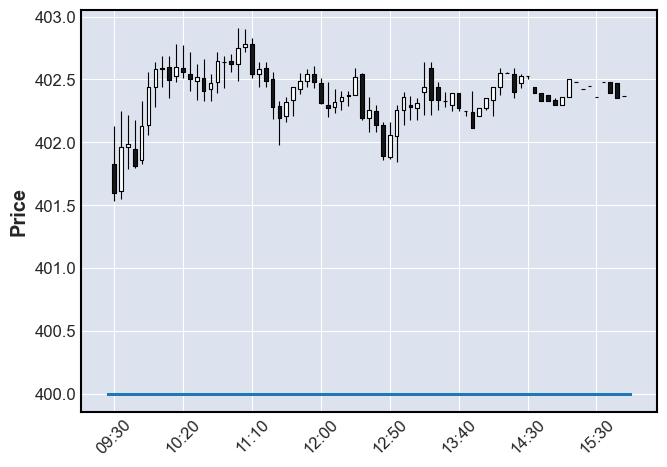

In [51]:
import numpy as np
import mplfinance as mpf
mpf.plot(stock_intraday[date],type='candle',hlines=[400,np.nan])


In [61]:
import datetime as dt

date1=dt.datetime(2022,11,25)
date='2022-11-25'

#stock_intraday[date]["Adj Close"].plot()
#plot daily pivots
daily_pp=daily_pivot.loc[date]["PP"]
daily_bc=daily_pivot.loc[date]["BC"]
daily_tc=daily_pivot.loc[date]["TC"]

daily_r1=daily_pivot.loc[date]["R1"]
daily_s1=daily_pivot.loc[date]["S1"]

if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["R2"][0]<stock_daily.loc[date]["High"]:
    daily_r2=daily_pivot.loc[date]["R2"][0]
else:
    daily_r2=np.nan
        
if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["S2"][0]<stock_daily.loc[date]["High"]:
    daily_s2=daily_pivot.loc[date]["S2"][0]
else:
    daily_s2=np.nan   
#plt.axhline(y=daily_pivot.loc[date]["PP"],color='b',linestyle='-')
#plt.axhline(y=daily_pivot.loc[date]["TC"],color='b',linestyle='--')
#plt.axhline(y=daily_pivot.loc[date]["BC"],color='b',linestyle='--')

#plt.axhline(y=daily_pivot.loc[date]["R1"],color='b',linestyle='--')
#plt.axhline(y=daily_pivot.loc[date]["S1"],color='b',linestyle='--')

i=0
j=0
#plot weekly pivots
for i in range(len(weekly_pivot)):
    if weekly_pivot["week"][i]==date1.isocalendar().week and weekly_pivot["year"][i]==date1.year:
        index_week=i
if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["PP"][0]<stock_daily.loc[date]["High"]:
    weekly_pp=weekly_pivot.iloc[index_week:]["PP"][0]
else:
    weekly_pp=np.nan
    
if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["R1"][0]<stock_daily.loc[date]["High"]:
    weekly_r1=weekly_pivot.iloc[index_week:]["R1"][0]
else:
    weekly_r1=np.nan
if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["S1"][0]<stock_daily.loc[date]["High"]:
    weekly_s1=weekly_pivot.iloc[index_week:]["S1"][0]
else:
    weekly_s1=np.nan
    
for j in range(len(monthly_pivot)):
    if monthly_pivot["month"][j]==date1.month and monthly_pivot["year"][j]==date1.year:
        index_month=j
        
#plot monthly pivots
if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['PP'][0]<stock_daily.loc[date]["High"]:
    monthly_pp=monthly_pivot.iloc[index_month:]['PP'][0]
else:
    monthly_pp=np.nan
if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['R1'][0]<stock_daily.loc[date]["High"]:
    monthly_r1=monthly_pivot.iloc[index_month:]['R1'][0]
else:
    monthly_r1=np.nan
if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['S1'][0]<stock_daily.loc[date]["High"]:
    monthly_s1=monthly_pivot.iloc[index_month:]['S1'][0]
else:
    monthly_s1=np.nan
    
yes_high=daily_pivot.shift(1).loc[date]["High"]
yes_low=daily_pivot.shift(1).loc[date]["Low"]

mpf.plot(stock_intraday[date],type='candle',
         hlines=dict(hlines=[daily_pp,daily_bc,daily_tc,daily_r1,daily_s1,weekly_pp,weekly_r1,weekly_s1,monthly_pp,monthly_r1,monthly_s1,yes_high,yes_low],
                    colors=['b','b','b','b','b','r','r','r','g','g','g','k','k'],
                    linestyle=['-','--','--','--','--','-','--','--','-','--','--','-','-']),
         title=date,
        savefig='testsave.png')

KeyError: '2022-11-25'

In [53]:
#subset the stock
stock_daily=stock_daily["2021"]
stock_daily

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2630729883.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  stock_daily=stock_daily["2021"]


,Open,High,Low,Close,Adj Close,Volume,week,month,year,PP,BC,TC,R1,S1,R2,S2,R3,S3
Date,,,,,,,,,,,,,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,358.128723,110210800,1,1,2021,373.26,372.95,373.57,375.29,371.86,376.69,369.83,378.72,368.43
2021-01-05,368.100006,372.500000,368.049988,371.329987,360.595245,66426200,1,1,2021,369.69,370.14,369.24,374.56,363.93,380.32,359.06,385.19,353.30
2021-01-06,369.709991,376.980011,369.119995,373.549988,362.751099,107997700,1,1,2021,370.63,370.27,370.99,373.21,368.76,375.08,366.18,377.66,364.31
2021-01-07,376.100006,379.899994,375.910004,379.100006,368.140686,68766800,1,1,2021,373.22,373.05,373.39,377.32,369.46,381.08,365.36,385.18,361.60
2021-01-08,380.589996,381.489990,377.100006,381.260010,370.238251,71677200,1,1,2021,378.30,377.90,378.70,380.69,376.70,382.29,374.31,384.68,372.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,472.059998,477.309998,472.010010,477.260010,469.640900,56808600,52,12,2021,470.48,470.42,470.54,472.32,468.77,474.03,466.93,475.87,465.22
2021-12-28,477.720001,478.809998,476.059998,476.869995,469.257050,47274600,52,12,2021,475.53,474.66,476.40,479.05,473.75,480.83,470.23,484.35,468.45
2021-12-29,476.980011,478.559998,475.920013,477.480011,469.857361,54503000,52,12,2021,477.25,477.43,477.07,478.44,475.69,480.00,474.50,481.19,472.94


In [54]:
# for i in range(len(stock_daily)):
#     date=stock_daily.index[i]
#     break

In [55]:
# #now.strftime("%m/%d/%Y, %H:%M:%S")
# date=date.strftime("%Y-%m-%d")
# date

In [56]:
#stock_intraday[date]["Adj Close"].plot()

In [67]:
for i in range(len(stock_daily)):
    date_datetime=stock_daily.index[i]
    date=date_datetime.strftime("%Y-%m-%d")
    
    print(date)
    #plot daily pivots
    daily_pp=daily_pivot.loc[date]["PP"]
    daily_bc=daily_pivot.loc[date]["BC"]
    daily_tc=daily_pivot.loc[date]["TC"]

    daily_r1=daily_pivot.loc[date]["R1"]
    daily_s1=daily_pivot.loc[date]["S1"]
    
    if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["R2"]<stock_daily.loc[date]["High"]:
        daily_r2=daily_pivot.loc[date]["R2"]
    else:
        daily_r2=np.nan
        
    if stock_daily.loc[date]["Low"]<daily_pivot.loc[date]["S2"]<stock_daily.loc[date]["High"]:
        daily_s2=daily_pivot.loc[date]["S2"]
    else:
        daily_s2=np.nan    

    i=0
    j=0
    #plot weekly pivots
    for i in range(len(weekly_pivot)):
        if weekly_pivot["week"][i]==date1.isocalendar().week and weekly_pivot["year"][i]==date1.year:
            index_week=i
    if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["PP"][0]<stock_daily.loc[date]["High"]:
        weekly_pp=weekly_pivot.iloc[index_week:]["PP"][0]
    else:
        weekly_pp=np.nan

    if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["R1"][0]<stock_daily.loc[date]["High"]:
        weekly_r1=weekly_pivot.iloc[index_week:]["R1"][0]
    else:
        weekly_r1=np.nan
    if stock_daily.loc[date]["Low"]<weekly_pivot.iloc[index_week:]["S1"][0]<stock_daily.loc[date]["High"]:
        weekly_s1=weekly_pivot.iloc[index_week:]["S1"][0]
    else:
        weekly_s1=np.nan

    for j in range(len(monthly_pivot)):
        if monthly_pivot["month"][j]==date1.month and monthly_pivot["year"][j]==date1.year:
            index_month=j

    #plot monthly pivots
    if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['PP'][0]<stock_daily.loc[date]["High"]:
        monthly_pp=monthly_pivot.iloc[index_month:]['PP'][0]
    else:
        monthly_pp=np.nan
    if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['R1'][0]<stock_daily.loc[date]["High"]:
        monthly_r1=monthly_pivot.iloc[index_month:]['R1'][0]
    else:
        monthly_r1=np.nan
    if stock_daily.loc[date]["Low"]<monthly_pivot.iloc[index_month:]['S1'][0]<stock_daily.loc[date]["High"]:
        monthly_s1=monthly_pivot.iloc[index_month:]['S1'][0]
    else:
        monthly_s1=np.nan

    yes_high=daily_pivot.shift(1).loc[date]["High"]
    yes_low=daily_pivot.shift(1).loc[date]["Low"]

    mpf.plot(stock_intraday[date],type='candle',
             hlines=dict(hlines=[daily_pp,daily_bc,daily_tc,daily_r1,daily_s1,daily_r2,daily_s2,weekly_pp,weekly_r1,weekly_s1,monthly_pp,monthly_r1,monthly_s1,yes_high,yes_low],
                        colors=['b','b','b','b','b','c','c','r','r','r','g','g','g','k','k'],
                        linestyle=['-','--','--','--','--','--','--','-','--','--','-','--','--','-','-']),
             title=date,
            savefig='pivot_candle/2021/'+date+'.png')
    #plt.clf()
    

2021-01-04
2021-01-05
2021-01-06


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-01-07
2021-01-08
2021-01-11
2021-01-12


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-01-13
2021-01-14
2021-01-15
2021-01-19


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-01-20
2021-01-21
2021-01-22
2021-01-25


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-01-26
2021-01-27
2021-01-28


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-01-29
2021-02-01
2021-02-02


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-02-03
2021-02-04
2021-02-05
2021-02-08


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-02-09
2021-02-10
2021-02-11
2021-02-12


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-02-16
2021-02-17
2021-02-18
2021-02-19


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-02-22
2021-02-23
2021-02-24


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-02-25
2021-02-26
2021-03-01
2021-03-02


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-03-03
2021-03-04
2021-03-05
2021-03-08
2021-03-09
2021-03-10
2021-03-11


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-03-12
2021-03-15
2021-03-16
2021-03-17


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-03-18
2021-03-19
2021-03-22
2021-03-23


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-03-24
2021-03-25
2021-03-26
2021-03-29
2021-03-30


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',


2021-03-31
2021-04-01
2021-04-05
2021-04-06


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-04-07
2021-04-08
2021-04-09
2021-04-12


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-04-13
2021-04-14
2021-04-15


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-04-16
2021-04-19
2021-04-20
2021-04-21


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-04-22
2021-04-23
2021-04-26


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-04-27
2021-04-28
2021-04-29
2021-04-30


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-05-03
2021-05-04
2021-05-05


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-05-06
2021-05-07
2021-05-10


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-05-11
2021-05-12
2021-05-13
2021-05-14


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-05-17
2021-05-18
2021-05-19
2021-05-20


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-05-21
2021-05-24
2021-05-25
2021-05-26


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-05-27
2021-05-28
2021-06-01
2021-06-02


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-06-03
2021-06-04
2021-06-07
2021-06-08


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-06-09


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-06-10
2021-06-11
2021-06-14
2021-06-15


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-06-16
2021-06-17
2021-06-18
2021-06-21
2021-06-22
2021-06-23
2021-06-24


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-06-25
2021-06-28
2021-06-29
2021-06-30


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-07-01
2021-07-02
2021-07-06
2021-07-07


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-07-08
2021-07-09
2021-07-12
2021-07-13


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-07-14
2021-07-15
2021-07-16
2021-07-19


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-07-20
2021-07-21
2021-07-22
2021-07-23
2021-07-26
2021-07-27


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-07-28
2021-07-29
2021-07-30
2021-08-02


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-08-03
2021-08-04
2021-08-05
2021-08-06


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-08-09
2021-08-10
2021-08-11
2021-08-12


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-08-13
2021-08-16
2021-08-17
2021-08-18


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-08-19
2021-08-20
2021-08-23
2021-08-24


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-08-25
2021-08-26
2021-08-27
2021-08-30


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-08-31
2021-09-01
2021-09-02
2021-09-03


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-09-07
2021-09-08
2021-09-09
2021-09-10


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-09-13
2021-09-14
2021-09-15
2021-09-16


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-09-17
2021-09-20
2021-09-21
2021-09-22


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-09-23


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-09-24
2021-09-27
2021-09-28
2021-09-29


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-09-30
2021-10-01
2021-10-04
2021-10-05


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-10-06
2021-10-07
2021-10-08
2021-10-11


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-10-12
2021-10-13
2021-10-14
2021-10-15


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-10-18
2021-10-19
2021-10-20
2021-10-21


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-10-22
2021-10-25
2021-10-26
2021-10-27


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-10-28
2021-10-29
2021-11-01
2021-11-02


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-11-03
2021-11-04
2021-11-05
2021-11-08


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-11-09
2021-11-10
2021-11-11
2021-11-12


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-11-15
2021-11-16
2021-11-17
2021-11-18


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-11-19
2021-11-22
2021-11-23
2021-11-24


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-11-26
2021-11-29
2021-11-30
2021-12-01


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-12-02
2021-12-03
2021-12-06


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-12-07
2021-12-08
2021-12-09
2021-12-10


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-12-13
2021-12-14
2021-12-15
2021-12-16


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-12-17
2021-12-20
2021-12-21


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-12-22
2021-12-23
2021-12-27
2021-12-28


/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_intraday[date],type='candle',
/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_30857/2902404513.py:65: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(stock_i

2021-12-29
2021-12-30
2021-12-31
